In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

In [78]:
from datetime import datetime, date

In [280]:
import seaborn as sns

In [215]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [18]:
df = pd.read_excel("Data input example v2.xlsx", sheet_name='Institution_Data')

In [19]:
df

,Date,Institution Name,Tier 1 Capital,RWA,Total Liabilities,Total Equity,Stage 1 Exposure,Stage 2 Exposure,Stage 3 Exposure,Total Gross Loans,Total Provisions,Total Assets,Total Assets (t-1),Total Assets (t-2),Total Assets (t-3),Net Income,Net Operating Income,Non Interest Income,Interest Income,Interest Expenses,Expenses,Liquid Assets,Current Liabilities,Liquidity Coverage Ratio (LCR)
0,2023-12-31,Addiko Bank d.d.,1.146552e+05,4.409817e+05,1.822883e+06,3.820252e+05,1.591062e+06,1.988827e+05,1.808025e+04,1.808025e+06,1.265617e+05,2.204908e+06,2.116712e+06,1.841539e+06,1.767878e+06,9154.448000,98933.026000,27142.253000,78642.470000,6289.030000,12121.070000,1.830074e+06,1.421849e+06,1.330000
1,2023-12-31,Agram banka d.d.,6.098586e+04,2.102961e+05,5.358907e+05,6.495521e+04,4.187896e+05,5.617909e+04,3.575033e+04,5.107190e+05,1.021438e+04,6.008459e+05,6.248797e+05,5.436454e+05,5.599547e+05,8187.466000,21370.500000,4742.416000,19385.950000,2535.933000,4177.531000,5.647952e+05,4.287126e+05,2.630000
2,2023-12-31,Banka Kovanica d.d.,3.207775e+04,1.283110e+05,2.057381e+05,2.755463e+04,1.510337e+05,3.485394e+04,7.745319e+03,1.936330e+05,1.355431e+04,2.332927e+05,2.332927e+05,1.936330e+05,1.916966e+05,4100.385000,13377.922000,2122.634000,14063.128000,2849.372000,3371.272000,2.262940e+05,1.604757e+05,1.820000
3,2023-12-31,Croatia banka d.d.,4.475365e+04,1.721294e+05,2.186886e+05,2.038002e+04,1.950800e+05,2.524565e+04,9.180235e+03,2.295059e+05,2.524565e+04,2.390686e+05,2.223338e+05,1.867604e+05,1.848928e+05,2468.747000,11740.269000,2051.748000,9581.170000,541.028000,1017.423000,2.199431e+05,1.683902e+05,1.710000
4,2023-12-31,Erste&Steiermärkische Bank d.d.,8.113498e+05,4.507499e+06,1.187849e+07,1.378856e+06,7.758201e+06,2.115873e+06,2.015117e+05,1.007559e+07,4.030234e+05,1.325735e+07,1.087103e+07,9.457793e+06,8.890326e+06,219215.296000,443464.264000,124649.617000,440750.096000,87469.169000,125191.658000,1.166647e+07,1.009672e+07,2.770000
5,2023-12-31,Hrvatska poštanska banka d.d.,5.150665e+05,3.029803e+06,6.512316e+06,5.337369e+05,4.853321e+06,7.511092e+05,1.733329e+05,5.777763e+06,8.666645e+05,7.046053e+06,6.341448e+06,5.643888e+06,5.926083e+06,80615.055000,185031.362000,71144.260000,172024.623000,26248.803000,68035.188000,5.989145e+06,5.340099e+06,1.470000
6,2023-12-31,Imex banka d.d.,1.222396e+04,5.556346e+04,1.559858e+05,1.765005e+04,1.314250e+05,1.510632e+04,4.531895e+03,1.510632e+05,1.208505e+04,1.736358e+05,1.684267e+05,1.768481e+05,1.821535e+05,419.428000,6424.483000,751.277000,6447.652000,776.945000,1047.885000,1.267541e+05,1.357076e+05,1.800000
7,2023-12-31,Istarska kreditna banka Umag d.d.,5.817463e+04,2.908731e+05,6.812923e+05,6.453630e+04,5.548965e+05,9.017068e+04,4.855344e+04,6.936206e+05,9.710688e+04,7.458286e+05,6.861623e+05,6.175461e+05,5.743178e+05,11318.736000,28666.504000,5407.792000,23996.851000,625.676000,1519.118000,5.892046e+05,5.518468e+05,2.080000
8,2023-12-31,J&T banka d.d.,4.967633e+03,3.821256e+04,6.265680e+04,1.226979e+04,5.845772e+04,1.056465e+04,1.408620e+03,7.043099e+04,4.225859e+03,7.492659e+04,6.143980e+04,5.775341e+04,5.140054e+04,-1540.404000,3529.971000,321.990000,3586.193000,543.926000,586.509000,5.619494e+04,4.949887e+04,1.340000
9,2023-12-31,Karlovačka banka d.d.,2.273360e+04,1.894466e+05,4.279502e+05,4.566638e+04,3.380675e+05,4.717221e+04,7.862035e+03,3.931018e+05,1.179305e+04,4.736166e+05,4.641442e+05,4.641442e+05,4.409370e+05,8726.894000,18188.249000,3678.447000,14629.908000,370.856000,1491.212000,3.599486e+05,3.765962e+05,1.260000


In [73]:
def loan_loss_provision_market(df):

    df_group = df[['Date', 'Total Provisions','Total Gross Loans']].groupby(by='Date',sort=False).sum()
    df_group['Market Loan Loss Rate'] = df_group['Total Provisions']/df_group['Total Gross Loans']
    df_group = df_group.reset_index()

    return df_group

def df_var(df):

    # Merging Loan Loss Providion market and Input Data
    df_all = pd.merge(df,loan_loss_provision_market(df),how='inner',on='Date')
    df_all = df_all.set_index('Institution Name')
    df_all = df_all.drop(columns=['Total Provisions_y','Total Gross Loans_y'])
    df_all = df_all.rename(columns={'Total Provisions_x':'Total Provisions','Total Gross Loans_x':'Total Gross Loans'})

    # Capital Adequacy
    df_all['Tier 1 Capital Ratio'] = df_all['Tier 1 Capital'] / df_all['RWA']
    df_all['Debt to Equity Ratio'] = df_all['Total Liabilities'] / df_all['Total Equity']

    # Asset Quality
    df_all['NPL to Total Gross Loans Ratio'] = df_all['Stage 3 Exposure'] / df_all['Total Gross Loans']
    df_all['Loan Loss Provision Rate'] = df_all['Total Provisions'] / df_all['Total Gross Loans']
    df_all["Loan Loss Provision Rate Scaled"] = abs(df_all['Loan Loss Provision Rate']-df_all['Market Loan Loss Rate'])

    # Management Quality
    df_all['Asset Growth Rate'] = (df_all['Total Assets'] - df_all['Total Assets (t-1)']) / df_all['Total Assets (t-1)']
    df_all['Asset Growth Rate (t-1)'] = (df_all['Total Assets (t-1)'] - df_all['Total Assets (t-2)']) / df_all['Total Assets (t-2)']
    df_all['Asset Growth Rate (t-2)'] = (df_all['Total Assets (t-2)'] - df_all['Total Assets (t-3)']) / df_all['Total Assets (t-3)']
    df_all['Asset Growth Rate 3Y Average'] = df_all[['Asset Growth Rate', 'Asset Growth Rate (t-1)', 'Asset Growth Rate (t-2)']].mean(axis=1)
    df_all['Efficiency Ratio'] = df_all['Expenses'] / df_all['Net Operating Income']

    # Earnings
    df_all['Return on Assets (ROA)'] = df_all['Net Income'] / ((df_all['Total Assets'] + df_all['Total Assets (t-1)']) / 2)
    df_all['Interest Expenses to Interest Income Ratio'] = df_all['Interest Expenses'] / df_all['Interest Income']

    # Liquidity
    df_all['Cash Ratio'] = df_all['Liquid Assets'] / df_all['Current Liabilities']

    # Sensitivity
    df_all['Non Interest Income Share'] = df_all['Non Interest Income'] / (df_all['Non Interest Income'] + df_all['Interest Income'])

    # Select CAMELS Variables
    df_final_var = df_all[['Date','Tier 1 Capital Ratio','Debt to Equity Ratio','NPL to Total Gross Loans Ratio','Loan Loss Provision Rate Scaled',
                           'Asset Growth Rate 3Y Average','Efficiency Ratio','Return on Assets (ROA)','Interest Expenses to Interest Income Ratio',
                           'Liquidity Coverage Ratio (LCR)','Cash Ratio','Non Interest Income Share']]

    return df_final_var

In [74]:
loan_loss_provision_market(df)

,Date,Total Provisions,Total Gross Loans,Market Loan Loss Rate
0,2023-12-31,5.484403e+06,6.293164e+07,0.087149
1,2022-12-31,5.311030e+06,5.785477e+07,0.091799
2,2021-12-31,4.710548e+06,5.501213e+07,0.085627
3,2020-12-31,4.612362e+06,5.119008e+07,0.090103


In [63]:
def assign_rating_variable(df_final, cvar, bins_dict):
    # Extract thresholds from bins Dict
    thr1 = bins_dict[cvar][2]
    thr2 = bins_dict[cvar][3]
    thr3 = bins_dict[cvar][4]
    thr4 = bins_dict[cvar][5]
    
    cond = [(df_final[cvar] <= thr1),
            (df_final[cvar] > thr1) & (df_final[cvar] <= thr2),
            (df_final[cvar] > thr2) & (df_final[cvar] <= thr3),
            (df_final[cvar] > thr3) & (df_final[cvar] <= thr4),
            (df_final[cvar] > thr4),
            (df_final[cvar].isnull())] # assign worst score (5) if data is missing
    # Check the variables interpretation, is a higher value better or worse?
    if bins_dict[cvar][1]:
        choice = [5,4,3,2,1,5]
    else:
        choice = [1,2,3,4,5,5]
    return cond, choice

In [ ]:
df_ratings = df_final.copy(deep=True)

In [ ]:
cond_tier1 = [(df_final['Tier 1 Capital Ratio']<=0.06),
                (df_final['Tier 1 Capital Ratio']>0.06)&(df_final['Tier 1 Capital Ratio']<=0.1),
                (df_final['Tier 1 Capital Ratio']>0.1)&(df_final['Tier 1 Capital Ratio']<=0.14),
                (df_final['Tier 1 Capital Ratio']>0.14)&(df_final['Tier 1 Capital Ratio']<=0.2),
                (df_final['Tier 1 Capital Ratio']>0.2),
                (df_final['Tier 1 Capital Ratio'].isnull())]
choice_tier1 =[5,4,3,2,1,5]
df_ratings['Tier 1 Capital Ratio'] = np.select(cond_tier1,choice_tier1)

In [43]:
cond_tier1

[Institution Name
 Addiko Bank d.d.                      False
 Agram banka d.d.                      False
 Banka Kovanica d.d.                   False
 Croatia banka d.d.                    False
 Erste&Steiermärkische Bank d.d.       False
 Hrvatska poštanska banka d.d.         False
 Imex banka d.d.                       False
 Istarska kreditna banka Umag d.d.     False
 J&T banka d.d.                        False
 Karlovačka banka d.d.                 False
 KentBank d.d.                         False
 OTP banka d.d.                        False
 Partner banka d.d.                    False
 Podravska banka d.d.                  False
 Privredna banka Zagreb d.d.           False
 Raiffeisenbank Austria d.d.           False
 Samoborska banka d.d.                 False
 Slatinska banka d.d.                  False
 Wüstenrot stambena štedionica d.d.    False
 Zagrebačka banka d.d.                 False
 Addiko Bank d.d.                      False
 Agram banka d.d.                    

In [45]:
df_final

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Addiko Bank d.d.,2023-12-31,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.004237,0.079970,1.330000,1.287109,0.256580
Agram banka d.d.,2023-12-31,0.290000,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.630000,1.317422,0.196549
Banka Kovanica d.d.,2023-12-31,0.250000,7.466553,0.04,0.017149,0.071640,0.252003,0.017576,0.202613,1.820000,1.410144,0.131142
Croatia banka d.d.,2023-12-31,0.260000,10.730539,0.04,0.022851,0.091949,0.086661,0.010701,0.056468,1.710000,1.306151,0.176374
Erste&Steiermärkische Bank d.d.,2023-12-31,0.180000,8.614743,0.02,0.047149,0.144256,0.282304,0.018171,0.198455,2.770000,1.155471,0.220463
Hrvatska poštanska banka d.d.,2023-12-31,0.170000,12.201360,0.03,0.062851,0.062363,0.367695,0.012043,0.152587,1.470000,1.121542,0.292571
Imex banka d.d.,2023-12-31,0.220000,8.837695,0.03,0.007149,-0.015272,0.163108,0.002452,0.120500,1.800000,0.934024,0.104360
Istarska kreditna banka Umag d.d.,2023-12-31,0.200000,10.556730,0.07,0.052851,0.091112,0.052993,0.015808,0.026073,2.080000,1.067696,0.183909
J&T banka d.d.,2023-12-31,0.130000,5.106592,0.02,0.027149,0.135646,0.166151,-0.022592,0.151672,1.340000,1.135277,0.082389


In [75]:
if "Date" in df.columns

Index(['Date', 'Institution Name', 'Tier 1 Capital', 'RWA',
       'Total Liabilities', 'Total Equity', 'Stage 1 Exposure',
       'Stage 2 Exposure', 'Stage 3 Exposure', 'Total Gross Loans',
       'Total Provisions', 'Total Assets', 'Total Assets (t-1)',
       'Total Assets (t-2)', 'Total Assets (t-3)', 'Net Income',
       'Net Operating Income', 'Non Interest Income', 'Interest Income',
       'Interest Expenses', 'Expenses', 'Liquid Assets', 'Current Liabilities',
       'Liquidity Coverage Ratio (LCR)'],
      dtype='object')

In [59]:
df_final.columns[1:]

Index(['Tier 1 Capital Ratio', 'Debt to Equity Ratio',
       'NPL to Total Gross Loans Ratio', 'Loan Loss Provision Rate Scaled',
       'Asset Growth Rate 3Y Average', 'Efficiency Ratio',
       'Return on Assets (ROA)', 'Interest Expenses to Interest Income Ratio',
       'Liquidity Coverage Ratio (LCR)', 'Cash Ratio',
       'Non Interest Income Share'],
      dtype='object')

In [ ]:
def create_df_ratings(df_final, bins_dict):

    df_ratings = df_final.copy(deep=True)

    # Extract numeric subratings
    for camels_var in df_final.columns[1:]:
        cond_tier1, choice_tier1 = assign_rating_variable(df_final, camels_var, bins_dict)
        df_ratings[camels_var] = np.select(cond_tier1, choice_tier1)

    # Composite Final Numeric Rating
    df_ratings['Composite Final Score'] = (df_ratings.iloc[:,1:] * camels_weights.values).sum(axis=1)

    # Final Rating Score 10 categories (+- added)
    cond_final_rating = [
        (df_ratings['Composite Final Score']>=1)&(df_ratings['Composite Final Score']<1.25), # A+
        (df_ratings['Composite Final Score']>=1.25)&(df_ratings['Composite Final Score']<1.5), # A-
            
        (df_ratings['Composite Final Score']>=1.5)&(df_ratings['Composite Final Score']<1.95), # B+
        (df_ratings['Composite Final Score']>=1.95)&(df_ratings['Composite Final Score']<2.4), # B-
            
        (df_ratings['Composite Final Score']>=2.4)&(df_ratings['Composite Final Score']<2.9), # C+
        (df_ratings['Composite Final Score']>=2.9)&(df_ratings['Composite Final Score']<3.4), # C-
            
        (df_ratings['Composite Final Score']>=3.4)&(df_ratings['Composite Final Score']<3.9), # D+
        (df_ratings['Composite Final Score']>=3.9)&(df_ratings['Composite Final Score']<4.5), # D-
            
        (df_ratings['Composite Final Score']>=4.5)&(df_ratings['Composite Final Score']<4.75), # E+
        (df_ratings['Composite Final Score']>=4.75)&(df_ratings['Composite Final Score']<=5), # E-
        
        (df_ratings['Composite Final Score'].isnull())] # assign E- score if data is missing

    # Composite Final Qualitative Rating
    choice_final_rating =['A+','A-','B+','B-','C+','C-','D+','D-','E+','E-','E-']
    df_ratings['Final Rating'] = np.select(cond_final_rating, choice_final_rating)

    # Column reorder
    df_ratings_column_order = [
        'Date','Final Rating','Composite Final Score',
                            'Tier 1 Capital Ratio','Debt to Equity Ratio',
                            'NPL to Total Gross Loans Ratio','Loan Loss Provision Rate Scaled',
                            'Asset Growth Rate 3Y Average','Efficiency Ratio',
                            'Return on Assets (ROA)','Interest Expenses to Interest Income Ratio', 
                            'Liquidity Coverage Ratio (LCR)','Cash Ratio',
                            'Non Interest Income Share']
        
    df_ratings = df_ratings.reindex(columns=df_ratings_column_order)

    return df_ratings

In [33]:
bins_dict = {'Tier 1 Capital Ratio':         ['expert', True, 0.06, 0.1, 0.14, 0.2], 
              'Debt to Equity Ratio':            ['expert', False, 6, 8, 10, 12],
              'NPL to Total Gross Loans Ratio':  ['expert', False, 0.04, 0.08, 0.12, 0.16],
              'Loan Loss Provision Rate Scaled': ['expert', False, 0.02, 0.04, 0.06, 0.08],
              'Asset Growth Rate 3Y Average':    ['expert', True, -0.03, 0, 0.03, 0.06],
              'Efficiency Ratio':                ['expert', False, 0.5, 0.7, 0.9, 1.1],
              'Return on Assets (ROA)':          ['expert', True, -0.002, 0.001, 0.005, 0.01],
              'Interest Expenses to Interest Income Ratio': ['expert', False,  0.07, 0.14, 0.21, 0.28],
              'Liquidity Coverage Ratio (LCR)':  ['expert', True,  1, 1.35, 1.7, 2],
              'Cash Ratio':                      ['expert', True,  0.075, 0.15, 0.225, 0.3],
              'Non Interest Income Share':       ['expert', True,  0.1, 0.2, 0.3, 0.4]}

# Variables Weights

camels_weights = pd.DataFrame({'Tier 1 Capital Ratio': 0.09,
              'Debt to Equity Ratio': 0.10,
              'NPL to Total Gross Loans Ratio': 0.15,
              'Loan Loss Provision Rate Scaled': 0.11,
              'Asset Growth Rate 3Y Average': 0.09,
              'Efficiency Ratio': 0.1,
              'Return on Assets (ROA)': 0.1,
              'Interest Expenses to Interest Income Ratio': 0.06, 
              'Liquidity Coverage Ratio (LCR)': 0.01,
              'Cash Ratio': 0.07,
              'Non Interest Income Share': 0.12}, index = ["Weight"])

In [39]:
df_final = df_var(df)

In [76]:
sorted(df_ratings['Date'].unique()).index()

TypeError: index expected at least 1 argument, got 0

In [85]:
df_ratings['Date'] = pd.to_datetime(df_ratings['Date'])

In [93]:
sorted(df_ratings['Date'].unique()).index(np.datetime64('2020-12-31T00:00:00.000000000'))

0

In [94]:
df_final

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Addiko Bank d.d.,2023-12-31,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.004237,0.079970,1.330000,1.287109,0.256580
Agram banka d.d.,2023-12-31,0.290000,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.630000,1.317422,0.196549
Banka Kovanica d.d.,2023-12-31,0.250000,7.466553,0.04,0.017149,0.071640,0.252003,0.017576,0.202613,1.820000,1.410144,0.131142
Croatia banka d.d.,2023-12-31,0.260000,10.730539,0.04,0.022851,0.091949,0.086661,0.010701,0.056468,1.710000,1.306151,0.176374
Erste&Steiermärkische Bank d.d.,2023-12-31,0.180000,8.614743,0.02,0.047149,0.144256,0.282304,0.018171,0.198455,2.770000,1.155471,0.220463
Hrvatska poštanska banka d.d.,2023-12-31,0.170000,12.201360,0.03,0.062851,0.062363,0.367695,0.012043,0.152587,1.470000,1.121542,0.292571
Imex banka d.d.,2023-12-31,0.220000,8.837695,0.03,0.007149,-0.015272,0.163108,0.002452,0.120500,1.800000,0.934024,0.104360
Istarska kreditna banka Umag d.d.,2023-12-31,0.200000,10.556730,0.07,0.052851,0.091112,0.052993,0.015808,0.026073,2.080000,1.067696,0.183909
J&T banka d.d.,2023-12-31,0.130000,5.106592,0.02,0.027149,0.135646,0.166151,-0.022592,0.151672,1.340000,1.135277,0.082389


In [95]:
df_ratings

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Addiko Bank d.d.,2023-12-31,1,1,1,1,1,1,3,2,4,1,3
Agram banka d.d.,2023-12-31,1,3,2,4,3,1,1,2,1,1,4
Banka Kovanica d.d.,2023-12-31,1,2,1,1,1,1,1,3,2,1,4
Croatia banka d.d.,2023-12-31,1,4,1,2,1,1,1,1,2,1,4
Erste&Steiermärkische Bank d.d.,2023-12-31,2,3,1,3,1,1,1,3,1,1,3
Hrvatska poštanska banka d.d.,2023-12-31,2,5,1,4,1,1,1,3,3,1,3
Imex banka d.d.,2023-12-31,1,3,1,1,4,1,3,2,2,1,4
Istarska kreditna banka Umag d.d.,2023-12-31,2,4,2,3,1,1,1,1,1,1,4
J&T banka d.d.,2023-12-31,3,1,1,2,1,1,5,3,4,1,5


In [96]:
filter_df = pd.merge(df_ratings, df_final, how='inner', left_index=True, right_index=True).reset_index()

In [97]:
filter_df

,Institution Name,Date_x,Tier 1 Capital Ratio_x,Debt to Equity Ratio_x,NPL to Total Gross Loans Ratio_x,Loan Loss Provision Rate Scaled_x,Asset Growth Rate 3Y Average_x,Efficiency Ratio_x,Return on Assets (ROA)_x,Interest Expenses to Interest Income Ratio_x,Liquidity Coverage Ratio (LCR)_x,Cash Ratio_x,Non Interest Income Share_x,Date_y,Tier 1 Capital Ratio_y,Debt to Equity Ratio_y,NPL to Total Gross Loans Ratio_y,Loan Loss Provision Rate Scaled_y,Asset Growth Rate 3Y Average_y,Efficiency Ratio_y,Return on Assets (ROA)_y,Interest Expenses to Interest Income Ratio_y,Liquidity Coverage Ratio (LCR)_y,Cash Ratio_y,Non Interest Income Share_y
0,Addiko Bank d.d.,2023-12-31,1,1,1,1,1,1,3,2,4,1,3,2023-12-31,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.004237,0.079970,1.330000,1.287109,0.256580
1,Addiko Bank d.d.,2023-12-31,1,1,1,1,1,1,3,2,4,1,3,2022-12-31,0.262857,5.160019,0.05,0.022552,0.060397,0.130256,0.004533,0.077244,1.316700,1.393106,0.279682
2,Addiko Bank d.d.,2023-12-31,1,1,1,1,1,1,3,2,4,1,3,2021-12-31,0.299113,4.528180,0.09,0.003497,0.039574,0.139344,0.004822,0.076455,1.171863,1.606169,0.273462
3,Addiko Bank d.d.,2023-12-31,1,1,1,1,1,1,3,2,4,1,3,2020-12-31,0.280611,4.576870,0.09,0.007079,0.071140,0.143791,0.004261,0.076455,1.066395,1.727063,0.285671
4,Addiko Bank d.d.,2022-12-31,1,1,2,2,1,1,3,2,4,1,3,2023-12-31,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.004237,0.079970,1.330000,1.287109,0.256580
5,Addiko Bank d.d.,2022-12-31,1,1,2,2,1,1,3,2,4,1,3,2022-12-31,0.262857,5.160019,0.05,0.022552,0.060397,0.130256,0.004533,0.077244,1.316700,1.393106,0.279682
6,Addiko Bank d.d.,2022-12-31,1,1,2,2,1,1,3,2,4,1,3,2021-12-31,0.299113,4.528180,0.09,0.003497,0.039574,0.139344,0.004822,0.076455,1.171863,1.606169,0.273462
7,Addiko Bank d.d.,2022-12-31,1,1,2,2,1,1,3,2,4,1,3,2020-12-31,0.280611,4.576870,0.09,0.007079,0.071140,0.143791,0.004261,0.076455,1.066395,1.727063,0.285671
8,Addiko Bank d.d.,2021-12-31,1,1,3,1,2,1,3,2,4,1,3,2023-12-31,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.004237,0.079970,1.330000,1.287109,0.256580
9,Addiko Bank d.d.,2021-12-31,1,1,3,1,2,1,3,2,4,1,3,2022-12-31,0.262857,5.160019,0.05,0.022552,0.060397,0.130256,0.004533,0.077244,1.316700,1.393106,0.279682


In [483]:
def benchmark_dataframe_totals(df, date):
    # Benchmark is the average across all data
    filter_df = df[df['Date'] == date]
    filter_df = pd.DataFrame(filter_df.sum(axis=0, numeric_only=True)).T
    filter_df.index = ['Benchmark values']
    df = filter_df.copy(deep=True)
    
    # Select CAMELS Variables
    df = df[[
        'Total Assets', 'Total Gross Loans',
    ]]
    
    return df

def benchmark_dataframe_camels(df, date):
    # Benchmark is the average across all data
    filter_df = df[df['Date'] == date]
    filter_df = pd.DataFrame(filter_df.mean(axis=0, numeric_only=True)).T
    filter_df.index = ['Benchmark values']
    df = filter_df.copy(deep=True)

    # Capital Adequacy
    df['Tier 1 Capital Ratio'] = df['Tier 1 Capital'] / df['RWA']
    df['Debt to Equity Ratio'] = df['Total Liabilities'] / df['Total Equity']
    
    # Asset Quality
    df['NPL to Total Gross Loans Ratio'] = df['Stage 3 Exposure'] / df['Total Gross Loans']
    df['Loan Loss Provision Rate'] = df['Total Provisions'] / df['Total Gross Loans']
    df['Loan Loss Provision Rate Scaled'] = 0 # by definition
    
    # Management Quality
    df['Asset Growth Rate'] = (df['Total Assets'] - df['Total Assets (t-1)']) / df['Total Assets (t-1)']
    df['Asset Growth Rate (t-1)'] = (df['Total Assets (t-1)'] - df['Total Assets (t-2)']) / df['Total Assets (t-2)']
    df['Asset Growth Rate (t-2)'] = (df['Total Assets (t-2)'] - df['Total Assets (t-3)']) / df['Total Assets (t-3)']
    df['Asset Growth Rate 3Y Average'] = df[['Asset Growth Rate', 'Asset Growth Rate (t-1)', 'Asset Growth Rate (t-2)']].mean(axis=1)
    df['Efficiency Ratio'] = df['Expenses'] / df['Net Operating Income']
    
    # Earnings
    df['Return on Assets (ROA)'] = df['Net Income'] / ((df['Total Assets'] + df['Total Assets (t-1)']) / 2)
    df['Interest Expenses to Interest Income Ratio'] = df['Interest Expenses'] / df['Interest Income']
    
    # Liquidity
    df['Cash Ratio'] = df['Liquid Assets'] / df['Current Liabilities']
    
    # Sensitivity
    df['Non Interest Income Share'] = df['Non Interest Income'] / (df['Non Interest Income'] + df['Interest Income'])

    # Select CAMELS Variables
    df = df[[
        'Tier 1 Capital Ratio', 'Debt to Equity Ratio', # C
        'NPL to Total Gross Loans Ratio', 'Loan Loss Provision Rate',# A
        'Asset Growth Rate 3Y Average', 'Efficiency Ratio',# M
        'Return on Assets (ROA)', 'Interest Expenses to Interest Income Ratio',# E
        'Liquidity Coverage Ratio (LCR)', 'Cash Ratio',# L
        'Non Interest Income Share'# S
    ]]

    return df

def df_var2(df, date):

    # Merging Loan Loss Providion market and Input Data
    # df_all = pd.merge(df,loan_loss_provision_market(df),how='inner',on='Date')
    # df_all = df_all.set_index('Institution Name')
    # df_all = df_all.drop(columns=['Total Provisions_y','Total Gross Loans_y'])
    # df_all = df_all.rename(columns={'Total Provisions_x':'Total Provisions','Total Gross Loans_x':'Total Gross Loans'})
    df_all = df.copy(deep=True)
    # df_all = df_all.set_index('Institution Name')
    df_all = df_all[df_all['Date'] == date]

    # Capital Adequacy
    df_all['Tier 1 Capital Ratio'] = df_all['Tier 1 Capital'] / df_all['RWA']
    df_all['Debt to Equity Ratio'] = df_all['Total Liabilities'] / df_all['Total Equity']

    # Asset Quality
    df_all['NPL to Total Gross Loans Ratio'] = df_all['Stage 3 Exposure'] / df_all['Total Gross Loans']
    # The Scaled version is less informative for this plot
    df_all['Loan Loss Provision Rate'] = df_all['Total Provisions'] / df_all['Total Gross Loans']
    # df_all["Loan Loss Provision Rate Scaled"] = abs(df_all['Loan Loss Provision Rate']-df_all['Market Loan Loss Rate'])

    # Management Quality
    df_all['Asset Growth Rate'] = (df_all['Total Assets'] - df_all['Total Assets (t-1)']) / df_all['Total Assets (t-1)']
    df_all['Asset Growth Rate (t-1)'] = (df_all['Total Assets (t-1)'] - df_all['Total Assets (t-2)']) / df_all['Total Assets (t-2)']
    df_all['Asset Growth Rate (t-2)'] = (df_all['Total Assets (t-2)'] - df_all['Total Assets (t-3)']) / df_all['Total Assets (t-3)']
    df_all['Asset Growth Rate 3Y Average'] = df_all[['Asset Growth Rate', 'Asset Growth Rate (t-1)', 'Asset Growth Rate (t-2)']].mean(axis=1)
    df_all['Efficiency Ratio'] = df_all['Expenses'] / df_all['Net Operating Income']

    # Earnings
    df_all['Return on Assets (ROA)'] = df_all['Net Income'] / ((df_all['Total Assets'] + df_all['Total Assets (t-1)']) / 2)
    df_all['Interest Expenses to Interest Income Ratio'] = df_all['Interest Expenses'] / df_all['Interest Income']

    # Liquidity
    df_all['Cash Ratio'] = df_all['Liquid Assets'] / df_all['Current Liabilities']

    # Sensitivity
    df_all['Non Interest Income Share'] = df_all['Non Interest Income'] / (df_all['Non Interest Income'] + df_all['Interest Income'])

    # Select CAMELS Variables
    df_final_var = df_all[[
        'Total Assets', 'Total Gross Loans',
        'Tier 1 Capital Ratio', 'Debt to Equity Ratio', # C
        'NPL to Total Gross Loans Ratio', 'Loan Loss Provision Rate',# A
        'Asset Growth Rate 3Y Average', 'Efficiency Ratio',# M
        'Return on Assets (ROA)', 'Interest Expenses to Interest Income Ratio',# E
        'Liquidity Coverage Ratio (LCR)', 'Cash Ratio',# L
        'Non Interest Income Share'# S
    ]]

    return df_final_var

In [485]:
# df = df.set_index("Institution Name")

In [486]:
df_bench_camels = benchmark_dataframe_camels(df, np.datetime64('2020-12-31T00:00:00.000000000'))
df_bench_totals = benchmark_dataframe_totals(df, np.datetime64('2020-12-31T00:00:00.000000000'))
df_bench = pd.concat([df_bench_totals, df_bench_camels], axis=1)

df_out = df_var2(df, np.datetime64('2020-12-31T00:00:00.000000000'))

df_tot_sum = pd.concat([df_bench, df_out], axis=0)

In [488]:
df_tot_sum.index.name = "Institution Name"

In [489]:
df_tot_sum

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,
Benchmark values,6.256199e+07,5.119008e+07,0.207114,6.797931,0.054444,0.090103,0.110489,0.274508,0.019828,0.195475,1.583571,0.991376,0.230788
Addiko Bank d.d.,1.767878e+06,1.330374e+06,0.280611,4.576870,0.090000,0.083023,0.071140,0.143791,0.004261,0.076455,1.066395,1.727063,0.285671
Agram banka d.d.,5.599547e+05,4.517054e+05,0.241667,8.411159,0.070000,0.019360,0.087231,0.190726,0.013288,0.155242,2.044772,1.707030,0.223473
Banka Kovanica d.d.,1.916966e+05,1.677268e+05,0.276420,6.390785,0.060000,0.065297,0.017256,0.273176,0.017550,0.197935,1.493528,1.627107,0.130495
Croatia banka d.d.,1.848928e+05,1.822818e+05,0.241775,11.992171,0.020000,0.125033,0.124846,0.092077,0.011216,0.043341,1.430463,1.406168,0.190388
Erste&Steiermärkische Bank d.d.,8.890326e+06,8.004348e+06,0.224941,7.698938,0.070000,0.048352,0.151606,0.210791,0.024152,0.243674,2.221629,1.101405,0.253415
Hrvatska poštanska banka d.d.,5.926083e+06,4.335027e+06,0.184737,10.026210,0.050000,0.156457,0.079333,0.351869,0.012850,0.147868,1.237005,1.010842,0.282141
Imex banka d.d.,1.821535e+05,1.227585e+05,0.289780,7.578483,0.040000,0.070181,0.074452,0.190943,0.002266,0.126876,1.398989,0.973964,0.099294
Istarska kreditna banka Umag d.d.,5.743178e+05,5.019663e+05,0.167915,10.528460,0.010000,0.148468,0.115435,0.053623,0.014807,0.032930,1.532045,1.062881,0.235894


In [459]:
def market_analysis_dataframe(df_tot):
    df_tot_market = df_tot.copy(deep=True)
    df_tot_market['Total Assets Market Share'] = df_tot_market['Total Assets'] / df_tot_market.loc['Benchmark values', 'Total Assets']
    df_tot_market['Total Gross Loans Market Share'] = df_tot_market['Total Gross Loans'] / df_tot_market.loc['Benchmark values', 'Total Gross Loans']

    for c_var in df_tot_market.columns[2:]:
        df_tot_market[c_var + ' Difference'] = ((df_tot_market[c_var] - df_tot_market.loc['Benchmark values', c_var])
                                                / df_tot_market.loc['Benchmark values', c_var])

    df_tot_market = df_tot_market[[
        'Total Assets Market Share', 'Total Gross Loans Market Share',
        'Tier 1 Capital Ratio Difference', 'Debt to Equity Ratio Difference',
        'NPL to Total Gross Loans Ratio Difference', 'Loan Loss Provision Rate Difference',
        'Asset Growth Rate 3Y Average Difference', 'Efficiency Ratio Difference', 
        'Return on Assets (ROA) Difference', 'Interest Expenses to Interest Income Ratio Difference', 
        'Liquidity Coverage Ratio (LCR) Difference', 'Cash Ratio Difference',
        'Non Interest Income Share Difference']].drop(index='Benchmark values')

    return df_tot_market

def styler_rel(df_tot_market, exp_bins):

    cm_green = sns.light_palette("#175C2C", as_cmap=True)
    cm_blend_reverse = sns.blend_palette(colors=['#AA2417', '#FFECBD', '#175C2C'], as_cmap=True)
    cm_blend = sns.blend_palette(colors=['#175C2C', '#FFECBD', '#AA2417'], as_cmap=True)

    styled_market_df_table = df_tot_market.style.format('{:.2%}')    
    styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_green, subset=['Total Assets Market Share'])
    styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_green, subset=['Total Gross Loans Market Share'])

    for c_var in styled_market_df_table.columns[2:]:
        c_var_pom = " ".join(c_var.split(" ")[0:-1])  # everything but last word
        if c_var_pom == 'Loan Loss Provision Rate':
            styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_blend, subset=[c_var])
        else:
            if exp_bins.loc[c_var_pom, "Reverse"]:
                styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_blend_reverse, subset=[c_var])
            else:
                styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_blend, subset=[c_var])
        
    return styled_market_df_table


def styler_abs(df_tot_market, exp_bins):
  
    # format_num = "{0:,.2f}".format
    # format_perc = "{0:.2%}".format
    # df_tot_market.iloc[:,0:2] = df_tot_market.iloc[:,0:2].applymap(format_num)
    # df_tot_market.iloc[:,2:] = df_tot_market.iloc[:,2:].applymap(format_perc)
    
    # styled_market_df_table = df_tot_market.copy(deep=True)
    
    styled_market_df_table = df_tot_market.style.format('{:.2%}').format('{:,.2f}', subset=['Total Assets', 'Total Gross Loans'])
    
    cm_green = sns.light_palette("#175C2C", as_cmap=True)
    cm_blend_reverse = sns.blend_palette(colors=['#AA2417', '#FFECBD', '#175C2C'], as_cmap=True)
    cm_blend = sns.blend_palette(colors=['#175C2C', '#FFECBD', '#AA2417'], as_cmap=True)

    styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_green, subset=['Total Assets'])
    styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_green, subset=['Total Gross Loans'])

    for c_var in styled_market_df_table.columns[2:]:
        if c_var == 'Loan Loss Provision Rate':
            styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_blend, subset=[c_var])
        else:
            if exp_bins.loc[c_var, "Reverse"]:
                styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_blend_reverse, subset=[c_var])
            else:
                styled_market_df_table = styled_market_df_table.background_gradient(cmap=cm_blend, subset=[c_var])
    
    return styled_market_df_table

In [490]:
df_tot_market = market_analysis_dataframe(df_tot_sum)

In [491]:
pd.DataFrame(df_tot_sum.loc["Benchmark values", :]).T.style.format('{:.2%}').format('{:,.2f}', subset=['Total Assets', 'Total Gross Loans'])

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Benchmark values,"62,561,986.65","51,190,080.64",20.71%,679.79%,5.44%,9.01%,11.05%,27.45%,1.98%,19.55%,158.36%,99.14%,23.08%


In [492]:
styler_abs(df_tot_sum, exp_bins)

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,
Benchmark values,"62,561,986.65","51,190,080.64",20.71%,679.79%,5.44%,9.01%,11.05%,27.45%,1.98%,19.55%,158.36%,99.14%,23.08%
Addiko Bank d.d.,"1,767,877.85","1,330,373.59",28.06%,457.69%,9.00%,8.30%,7.11%,14.38%,0.43%,7.65%,106.64%,172.71%,28.57%
Agram banka d.d.,"559,954.74","451,705.44",24.17%,841.12%,7.00%,1.94%,8.72%,19.07%,1.33%,15.52%,204.48%,170.70%,22.35%
Banka Kovanica d.d.,"191,696.64","167,726.82",27.64%,639.08%,6.00%,6.53%,1.73%,27.32%,1.75%,19.79%,149.35%,162.71%,13.05%
Croatia banka d.d.,"184,892.81","182,281.83",24.18%,1199.22%,2.00%,12.50%,12.48%,9.21%,1.12%,4.33%,143.05%,140.62%,19.04%
Erste&Steiermärkische Bank d.d.,"8,890,325.63","8,004,347.56",22.49%,769.89%,7.00%,4.84%,15.16%,21.08%,2.42%,24.37%,222.16%,110.14%,25.34%
Hrvatska poštanska banka d.d.,"5,926,082.87","4,335,027.03",18.47%,1002.62%,5.00%,15.65%,7.93%,35.19%,1.28%,14.79%,123.70%,101.08%,28.21%
Imex banka d.d.,"182,153.52","122,758.46",28.98%,757.85%,4.00%,7.02%,7.45%,19.09%,0.23%,12.69%,139.90%,97.40%,9.93%
Istarska kreditna banka Umag d.d.,"574,317.85","501,966.28",16.79%,1052.85%,1.00%,14.85%,11.54%,5.36%,1.48%,3.29%,153.20%,106.29%,23.59%


In [493]:
styler_abs(df_tot_sum.drop(index="Benchmark values"), exp_bins)

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,
Addiko Bank d.d.,"1,767,877.85","1,330,373.59",28.06%,457.69%,9.00%,8.30%,7.11%,14.38%,0.43%,7.65%,106.64%,172.71%,28.57%
Agram banka d.d.,"559,954.74","451,705.44",24.17%,841.12%,7.00%,1.94%,8.72%,19.07%,1.33%,15.52%,204.48%,170.70%,22.35%
Banka Kovanica d.d.,"191,696.64","167,726.82",27.64%,639.08%,6.00%,6.53%,1.73%,27.32%,1.75%,19.79%,149.35%,162.71%,13.05%
Croatia banka d.d.,"184,892.81","182,281.83",24.18%,1199.22%,2.00%,12.50%,12.48%,9.21%,1.12%,4.33%,143.05%,140.62%,19.04%
Erste&Steiermärkische Bank d.d.,"8,890,325.63","8,004,347.56",22.49%,769.89%,7.00%,4.84%,15.16%,21.08%,2.42%,24.37%,222.16%,110.14%,25.34%
Hrvatska poštanska banka d.d.,"5,926,082.87","4,335,027.03",18.47%,1002.62%,5.00%,15.65%,7.93%,35.19%,1.28%,14.79%,123.70%,101.08%,28.21%
Imex banka d.d.,"182,153.52","122,758.46",28.98%,757.85%,4.00%,7.02%,7.45%,19.09%,0.23%,12.69%,139.90%,97.40%,9.93%
Istarska kreditna banka Umag d.d.,"574,317.85","501,966.28",16.79%,1052.85%,1.00%,14.85%,11.54%,5.36%,1.48%,3.29%,153.20%,106.29%,23.59%
J&T banka d.d.,"51,400.54","51,724.52",11.35%,524.99%,4.00%,8.42%,0.12%,16.93%,-2.64%,12.05%,122.21%,128.56%,8.42%


In [494]:
styler_rel(df_tot_market, exp_bins)

,Total Assets Market Share,Total Gross Loans Market Share,Tier 1 Capital Ratio Difference,Debt to Equity Ratio Difference,NPL to Total Gross Loans Ratio Difference,Loan Loss Provision Rate Difference,Asset Growth Rate 3Y Average Difference,Efficiency Ratio Difference,Return on Assets (ROA) Difference,Interest Expenses to Interest Income Ratio Difference,Liquidity Coverage Ratio (LCR) Difference,Cash Ratio Difference,Non Interest Income Share Difference
Institution Name,,,,,,,,,,,,,
Addiko Bank d.d.,2.83%,2.60%,35.49%,-32.67%,65.31%,-7.86%,-35.61%,-47.62%,-78.51%,-60.89%,-32.66%,74.21%,23.78%
Agram banka d.d.,0.90%,0.88%,16.68%,23.73%,28.57%,-78.51%,-21.05%,-30.52%,-32.99%,-20.58%,29.12%,72.19%,-3.17%
Banka Kovanica d.d.,0.31%,0.33%,33.46%,-5.99%,10.20%,-27.53%,-84.38%,-0.49%,-11.49%,1.26%,-5.69%,64.13%,-43.46%
Croatia banka d.d.,0.30%,0.36%,16.74%,76.41%,-63.27%,38.77%,12.99%,-66.46%,-43.44%,-77.83%,-9.67%,41.84%,-17.51%
Erste&Steiermärkische Bank d.d.,14.21%,15.64%,8.61%,13.25%,28.57%,-46.34%,37.21%,-23.21%,21.81%,24.66%,40.29%,11.10%,9.80%
Hrvatska poštanska banka d.d.,9.47%,8.47%,-10.80%,47.49%,-8.16%,73.64%,-28.20%,28.18%,-35.19%,-24.35%,-21.89%,1.96%,22.25%
Imex banka d.d.,0.29%,0.24%,39.91%,11.48%,-26.53%,-22.11%,-32.62%,-30.44%,-88.57%,-35.09%,-11.66%,-1.76%,-56.98%
Istarska kreditna banka Umag d.d.,0.92%,0.98%,-18.93%,54.88%,-81.63%,64.78%,4.48%,-80.47%,-25.32%,-83.15%,-3.25%,7.21%,2.21%
J&T banka d.d.,0.08%,0.10%,-45.20%,-22.77%,-26.53%,-6.59%,-98.88%,-38.33%,-233.28%,-38.34%,-22.83%,29.67%,-63.52%


In [465]:
styler_abs(df_tot_sum, exp_bins)

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Benchmark values,"62,561,986.65","51,190,080.64",20.71%,679.79%,5.44%,9.01%,11.05%,27.45%,1.98%,19.55%,158.36%,99.14%,23.08%
Addiko Bank d.d.,"1,767,877.85","1,330,373.59",28.06%,457.69%,9.00%,8.30%,7.11%,14.38%,0.43%,7.65%,106.64%,172.71%,28.57%
Agram banka d.d.,"559,954.74","451,705.44",24.17%,841.12%,7.00%,1.94%,8.72%,19.07%,1.33%,15.52%,204.48%,170.70%,22.35%
Banka Kovanica d.d.,"191,696.64","167,726.82",27.64%,639.08%,6.00%,6.53%,1.73%,27.32%,1.75%,19.79%,149.35%,162.71%,13.05%
Croatia banka d.d.,"184,892.81","182,281.83",24.18%,1199.22%,2.00%,12.50%,12.48%,9.21%,1.12%,4.33%,143.05%,140.62%,19.04%
Erste&Steiermärkische Bank d.d.,"8,890,325.63","8,004,347.56",22.49%,769.89%,7.00%,4.84%,15.16%,21.08%,2.42%,24.37%,222.16%,110.14%,25.34%
Hrvatska poštanska banka d.d.,"5,926,082.87","4,335,027.03",18.47%,1002.62%,5.00%,15.65%,7.93%,35.19%,1.28%,14.79%,123.70%,101.08%,28.21%
Imex banka d.d.,"182,153.52","122,758.46",28.98%,757.85%,4.00%,7.02%,7.45%,19.09%,0.23%,12.69%,139.90%,97.40%,9.93%
Istarska kreditna banka Umag d.d.,"574,317.85","501,966.28",16.79%,1052.85%,1.00%,14.85%,11.54%,5.36%,1.48%,3.29%,153.20%,106.29%,23.59%
J&T banka d.d.,"51,400.54","51,724.52",11.35%,524.99%,4.00%,8.42%,0.12%,16.93%,-2.64%,12.05%,122.21%,128.56%,8.42%


In [372]:
df_tot_sum

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Benchmark values,6.256199e+07,5.119008e+07,0.207114,6.797931,0.054444,0.090103,0.110489,0.274508,0.019828,0.195475,1.583571,0.991376,0.230788
Addiko Bank d.d.,1.767878e+06,1.330374e+06,0.280611,4.576870,0.090000,0.083023,0.071140,0.143791,0.004261,0.076455,1.066395,1.727063,0.285671
Agram banka d.d.,5.599547e+05,4.517054e+05,0.241667,8.411159,0.070000,0.019360,0.087231,0.190726,0.013288,0.155242,2.044772,1.707030,0.223473
Banka Kovanica d.d.,1.916966e+05,1.677268e+05,0.276420,6.390785,0.060000,0.065297,0.017256,0.273176,0.017550,0.197935,1.493528,1.627107,0.130495
Croatia banka d.d.,1.848928e+05,1.822818e+05,0.241775,11.992171,0.020000,0.125033,0.124846,0.092077,0.011216,0.043341,1.430463,1.406168,0.190388
Erste&Steiermärkische Bank d.d.,8.890326e+06,8.004348e+06,0.224941,7.698938,0.070000,0.048352,0.151606,0.210791,0.024152,0.243674,2.221629,1.101405,0.253415
Hrvatska poštanska banka d.d.,5.926083e+06,4.335027e+06,0.184737,10.026210,0.050000,0.156457,0.079333,0.351869,0.012850,0.147868,1.237005,1.010842,0.282141
Imex banka d.d.,1.821535e+05,1.227585e+05,0.289780,7.578483,0.040000,0.070181,0.074452,0.190943,0.002266,0.126876,1.398989,0.973964,0.099294
Istarska kreditna banka Umag d.d.,5.743178e+05,5.019663e+05,0.167915,10.528460,0.010000,0.148468,0.115435,0.053623,0.014807,0.032930,1.532045,1.062881,0.235894
J&T banka d.d.,5.140054e+04,5.172452e+04,0.113501,5.249906,0.040000,0.084167,0.001239,0.169283,-0.026427,0.120537,1.222064,1.285555,0.084194


In [338]:
styler(df_tot_sum, exp_bins, False)

KeyError: "None of [Index(['Total Assets Market Share', 'Total Gross Loans Market Share'], dtype='object')] are in the [columns]"

In [334]:
df_tot_market

,Total Assets Market Share,Total Gross Loans Market Share,Tier 1 Capital Ratio Difference,Debt to Equity Ratio Difference,NPL to Total Gross Loans Ratio Difference,Loan Loss Provision Rate Difference,Asset Growth Rate 3Y Average Difference,Efficiency Ratio Difference,Return on Assets (ROA) Difference,Interest Expenses to Interest Income Ratio Difference,Liquidity Coverage Ratio (LCR) Difference,Cash Ratio Difference,Non Interest Income Share Difference
Addiko Bank d.d.,0.028258,0.025989,0.354865,-0.326726,0.653074,-0.078570,-0.356137,-0.476188,-0.785095,-0.608873,-0.326588,0.742086,0.237808
Agram banka d.d.,0.008950,0.008824,0.166829,0.237312,0.285724,-0.785139,-0.210504,-0.305210,-0.329862,-0.205821,0.291242,0.721878,-0.031693
Banka Kovanica d.d.,0.003064,0.003277,0.334628,-0.059893,0.102050,-0.275307,-0.843822,-0.004852,-0.114923,0.012585,-0.056860,0.641260,-0.434566
Croatia banka d.d.,0.002955,0.003561,0.167354,0.764091,-0.632650,0.387668,0.129942,-0.664574,-0.434367,-0.778279,-0.096685,0.418400,-0.175050
Erste&Steiermärkische Bank d.d.,0.142104,0.156365,0.086072,0.132541,0.285724,-0.463372,0.372142,-0.232115,0.218080,0.246573,0.402923,0.110986,0.098044
Hrvatska poštanska banka d.d.,0.094723,0.084685,-0.108040,0.474892,-0.081625,0.736436,-0.281980,0.281816,-0.351940,-0.243543,-0.218851,0.019635,0.222512
Imex banka d.d.,0.002912,0.002398,0.399131,0.114822,-0.265300,-0.221099,-0.326158,-0.304419,-0.885718,-0.350934,-0.116561,-0.017564,-0.569759
Istarska kreditna banka Umag d.d.,0.009180,0.009806,-0.189262,0.548774,-0.816325,0.647767,0.044763,-0.804657,-0.253224,-0.831539,-0.032538,0.072126,0.022127
J&T banka d.d.,0.000822,0.001010,-0.451986,-0.227720,-0.265300,-0.065880,-0.988786,-0.383323,-2.332790,-0.383364,-0.228286,0.296737,-0.635188
Karlovačka banka d.d.,0.007048,0.005839,-0.313647,0.283179,0.102050,-0.698535,0.234744,-0.727074,-0.169717,-0.880974,-0.289018,-0.074670,-0.217024


In [323]:
style_df_tot_market

,Total Assets Market Share,Total Gross Loans Market Share,Tier 1 Capital Ratio Difference,Debt to Equity Ratio Difference,NPL to Total Gross Loans Ratio Difference,Loan Loss Provision Rate Difference,Asset Growth Rate 3Y Average Difference,Efficiency Ratio Difference,Return on Assets (ROA) Difference,Interest Expenses to Interest Income Ratio Difference,Liquidity Coverage Ratio (LCR) Difference,Cash Ratio Difference,Non Interest Income Share Difference
Addiko Bank d.d.,2.83%,2.60%,35.49%,-32.67%,65.31%,-7.86%,-35.61%,-47.62%,-78.51%,-60.89%,-32.66%,74.21%,23.78%
Agram banka d.d.,0.90%,0.88%,16.68%,23.73%,28.57%,-78.51%,-21.05%,-30.52%,-32.99%,-20.58%,29.12%,72.19%,-3.17%
Banka Kovanica d.d.,0.31%,0.33%,33.46%,-5.99%,10.20%,-27.53%,-84.38%,-0.49%,-11.49%,1.26%,-5.69%,64.13%,-43.46%
Croatia banka d.d.,0.30%,0.36%,16.74%,76.41%,-63.27%,38.77%,12.99%,-66.46%,-43.44%,-77.83%,-9.67%,41.84%,-17.51%
Erste&Steiermärkische Bank d.d.,14.21%,15.64%,8.61%,13.25%,28.57%,-46.34%,37.21%,-23.21%,21.81%,24.66%,40.29%,11.10%,9.80%
Hrvatska poštanska banka d.d.,9.47%,8.47%,-10.80%,47.49%,-8.16%,73.64%,-28.20%,28.18%,-35.19%,-24.35%,-21.89%,1.96%,22.25%
Imex banka d.d.,0.29%,0.24%,39.91%,11.48%,-26.53%,-22.11%,-32.62%,-30.44%,-88.57%,-35.09%,-11.66%,-1.76%,-56.98%
Istarska kreditna banka Umag d.d.,0.92%,0.98%,-18.93%,54.88%,-81.63%,64.78%,4.48%,-80.47%,-25.32%,-83.15%,-3.25%,7.21%,2.21%
J&T banka d.d.,0.08%,0.10%,-45.20%,-22.77%,-26.53%,-6.59%,-98.88%,-38.33%,-233.28%,-38.34%,-22.83%,29.67%,-63.52%
Karlovačka banka d.d.,0.70%,0.58%,-31.36%,28.32%,10.20%,-69.85%,23.47%,-72.71%,-16.97%,-88.10%,-28.90%,-7.47%,-21.70%


In [317]:
df_tot.style.format('{:.2%}')

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Benchmark values,312809933.24%,255950403.21%,20.71%,679.79%,5.44%,9.01%,11.05%,27.45%,1.98%,19.55%,158.36%,99.14%,23.08%
Addiko Bank d.d.,176787784.85%,133037359.03%,28.06%,457.69%,9.00%,8.30%,7.11%,14.38%,0.43%,7.65%,106.64%,172.71%,28.57%
Agram banka d.d.,55995473.80%,45170543.81%,24.17%,841.12%,7.00%,1.94%,8.72%,19.07%,1.33%,15.52%,204.48%,170.70%,22.35%
Banka Kovanica d.d.,19169664.36%,16772681.79%,27.64%,639.08%,6.00%,6.53%,1.73%,27.32%,1.75%,19.79%,149.35%,162.71%,13.05%
Croatia banka d.d.,18489280.65%,18228183.29%,24.18%,1199.22%,2.00%,12.50%,12.48%,9.21%,1.12%,4.33%,143.05%,140.62%,19.04%
Erste&Steiermärkische Bank d.d.,889032563.25%,800434756.26%,22.49%,769.89%,7.00%,4.84%,15.16%,21.08%,2.42%,24.37%,222.16%,110.14%,25.34%
Hrvatska poštanska banka d.d.,592608286.56%,433502702.78%,18.47%,1002.62%,5.00%,15.65%,7.93%,35.19%,1.28%,14.79%,123.70%,101.08%,28.21%
Imex banka d.d.,18215352.41%,12275845.78%,28.98%,757.85%,4.00%,7.02%,7.45%,19.09%,0.23%,12.69%,139.90%,97.40%,9.93%
Istarska kreditna banka Umag d.d.,57431784.67%,50196628.32%,16.79%,1052.85%,1.00%,14.85%,11.54%,5.36%,1.48%,3.29%,153.20%,106.29%,23.59%
J&T banka d.d.,5140053.71%,5172451.97%,11.35%,524.99%,4.00%,8.42%,0.12%,16.93%,-2.64%,12.05%,122.21%,128.56%,8.42%


In [315]:
style_df

,Total Assets Market Share,Total Gross Loans Market Share,Tier 1 Capital Ratio Difference,Debt to Equity Ratio Difference,NPL to Total Gross Loans Ratio Difference,Loan Loss Provision Rate Difference,Asset Growth Rate 3Y Average Difference,Efficiency Ratio Difference,Return on Assets (ROA) Difference,Interest Expenses to Interest Income Ratio Difference,Liquidity Coverage Ratio (LCR) Difference,Cash Ratio Difference,Non Interest Income Share Difference
Addiko Bank d.d.,2.83%,2.60%,35.49%,-32.67%,65.31%,-7.86%,-35.61%,-47.62%,-78.51%,-60.89%,-32.66%,74.21%,23.78%
Agram banka d.d.,0.90%,0.88%,16.68%,23.73%,28.57%,-78.51%,-21.05%,-30.52%,-32.99%,-20.58%,29.12%,72.19%,-3.17%
Banka Kovanica d.d.,0.31%,0.33%,33.46%,-5.99%,10.20%,-27.53%,-84.38%,-0.49%,-11.49%,1.26%,-5.69%,64.13%,-43.46%
Croatia banka d.d.,0.30%,0.36%,16.74%,76.41%,-63.27%,38.77%,12.99%,-66.46%,-43.44%,-77.83%,-9.67%,41.84%,-17.51%
Erste&Steiermärkische Bank d.d.,14.21%,15.64%,8.61%,13.25%,28.57%,-46.34%,37.21%,-23.21%,21.81%,24.66%,40.29%,11.10%,9.80%
Hrvatska poštanska banka d.d.,9.47%,8.47%,-10.80%,47.49%,-8.16%,73.64%,-28.20%,28.18%,-35.19%,-24.35%,-21.89%,1.96%,22.25%
Imex banka d.d.,0.29%,0.24%,39.91%,11.48%,-26.53%,-22.11%,-32.62%,-30.44%,-88.57%,-35.09%,-11.66%,-1.76%,-56.98%
Istarska kreditna banka Umag d.d.,0.92%,0.98%,-18.93%,54.88%,-81.63%,64.78%,4.48%,-80.47%,-25.32%,-83.15%,-3.25%,7.21%,2.21%
J&T banka d.d.,0.08%,0.10%,-45.20%,-22.77%,-26.53%,-6.59%,-98.88%,-38.33%,-233.28%,-38.34%,-22.83%,29.67%,-63.52%
Karlovačka banka d.d.,0.70%,0.58%,-31.36%,28.32%,10.20%,-69.85%,23.47%,-72.71%,-16.97%,-88.10%,-28.90%,-7.47%,-21.70%


<Axes: >

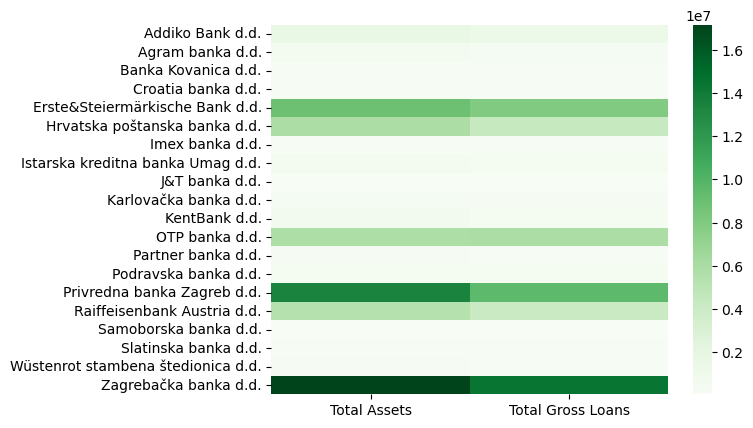

In [294]:
sns.heatmap(df_tot_sum[["Total Assets", "Total Gross Loans"]].drop(index='Benchmark values'), cmap="Greens")